In [1]:
import dhlab.nbtext as nb
import dhlab.graph_networkx_louvain as gnl
import dhlab.module_update as mu

In [2]:
mu.update('dhlab_v2')

Updated file `C:\Users\yoons\Documents\GitHub\Qualico2020\dhlab_v2.py`

In [3]:
import dhlab_v2 as d2

In [48]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22, 'figure.figsize':(14,7), 'lines.linewidth': 6})

In [49]:
#plt.rcParams.keys()

In [5]:
corpus = d2.document_corpus(from_year = 1990, to_year = 2020, limit = 50)

In [32]:
corpus = d2.document_corpus(doctype='digibok', from_year = 1990, to_year = 2020, limit = 50)

In [33]:
corpus.urn

0     URN:NBN:no-nb_digibok_2011092708122
1     URN:NBN:no-nb_digibok_2008020404005
2     URN:NBN:no-nb_digibok_2019032277113
3     URN:NBN:no-nb_digibok_2011040705003
4     URN:NBN:no-nb_digibok_2009021600058
5     URN:NBN:no-nb_digibok_2009080404022
6     URN:NBN:no-nb_digibok_2011022306065
7     URN:NBN:no-nb_digibok_2009080301147
8     URN:NBN:no-nb_digibok_2009121100068
9     URN:NBN:no-nb_digibok_2008031300055
10    URN:NBN:no-nb_digibok_2013050606110
11    URN:NBN:no-nb_digibok_2011053108107
12    URN:NBN:no-nb_digibok_2011063008024
13    URN:NBN:no-nb_digibok_2010071503009
14    URN:NBN:no-nb_digibok_2011110308010
15    URN:NBN:no-nb_digibok_2012102308048
16    URN:NBN:no-nb_digibok_2010090608090
17    URN:NBN:no-nb_digibok_2020020677030
18    URN:NBN:no-nb_digibok_2013121708084
19    URN:NBN:no-nb_digibok_2012121406015
20    URN:NBN:no-nb_digibok_2009050704051
21    URN:NBN:no-nb_digibok_2009040100113
22    URN:NBN:no-nb_digibok_2007112204052
23    URN:NBN:no-nb_digibok_201607

In [15]:
d2.konkordans(urns = list(corpus.urn), query="""  "hans arm"   """).style

,docid,urn,conc


In [21]:
d2.konkordans(urns = list(corpus.urn), query="NEAR(hans hode, 0) OR NEAR(hans hodet, 0)""").style

,docid,urn,conc
0,100091061,URN:NBN:no-nb_digibok_2012050408094,spørsmål for gjennom hodet hans . Kunne han tilgi henne ? Kunne han glemme ? Hvor kom tillit inn i bildet her ? Trodde han virkelig at han kunne...
1,100091061,URN:NBN:no-nb_digibok_2012050408094,- Hmm ? Hodet hans hvilte fremdeles på skulderen hennes .
2,100069235,URN:NBN:no-nb_digibok_2011121306009,Hodet hans bikket framover . Ordene kom som såre
3,100386555,URN:NBN:no-nb_digibok_2018072307131,... En mann smiler før hodet hans knekker til siden . En annen blir dratt ut av bilen . Kjeften hans bobler av blod som renner nedover og...
4,100430578,URN:NBN:no-nb_digibok_2020122148574,"... Odd oppdaget hodet hans på toppen av slusekantene , og da det kom et nykk i tauet ble Alf dratt utfor kanten . Heldigvis traff han ikke..."
5,200718619,URN:NBN:no-nb_digavis_gudbrandsdolendagnin_null_null_20040910_168_209_1,"... De ligger og modnes i hans hode . Kanskje det er derfor han er så nervøs . Han står på et vis foran en vanskelig fødsel , og..."


In [45]:
d2.konkordans(urns = list(d2.document_corpus(from_year = 1990, to_year = 2020, limit = 500, doctype='digibok').urn), query="NEAR(hans legger, 0) OR NEAR(hans leggene, 0)""").style

,docid,urn,conc
0,100283640,URN:NBN:no-nb_digibok_2016022607535,"... Små elver av svette renner nedover leggene hans og gjør hans gule sokker enda gulere . Han har en forferdelig jobb , og vår klaging på temperaturen..."
1,100512041,URN:NBN:no-nb_digibok_2010071303012,"... Den stinkende , svovelholdige svarte gjørmen under saltskorpen pipler oppover leggene hans . Han kommer seg opp på bena igjen og braser gjennom pterodaktylredene som"
2,100220459,URN:NBN:no-nb_digibok_2014090108016,"... Legger pannen min mot hans og leter etter munnen hans . Legger ansiktet mitt mot munnen hans og drikker den , merker forbauset at jeg har lepper..."
3,100220459,URN:NBN:no-nb_digibok_2014090108016,"... Hun sparker av sandalene , kryper opp i sengen , varmer føttene mot leggene hans . Han trekker henne inntil seg , den gryntende strupelyden forteller om velvære . Kroppene..."
4,100193959,URN:NBN:no-nb_digibok_2014022808285,"... En svimmel Eva bretter fingrene rundt jakkeslaget hans , legger en flat hand mot brystet hans . Der varmen er ."
5,100444088,URN:NBN:no-nb_digibok_2008032600090,"- Jeg betaler tre daler , legger Hans til . - Gutten fortjener det -"
6,100444088,URN:NBN:no-nb_digibok_2008032600090,- Takk ! Hans legger et par skillinger i den gamles hånd .
7,100444088,URN:NBN:no-nb_digibok_2008032600090,Hans legger fram sitt ærend . Gutten som er død i masovnen . Her er det ikke noe lik å begrave . Et menneske er forsvunnet i ovnen...
8,100454612,URN:NBN:no-nb_digibok_2008013101032,"... Bitterheten brant i ham , som solen brant på baksiden av de bleke leggene hans . Plutselig rev han papiret i småbeter og slapp dem utover relingea..."
9,100423866,URN:NBN:no-nb_digibok_2008090100074,"... Uten å slippe Gjermund , ansiktet hans legger seg medgjørlig mot halsen hennes . Hun klamrer og drar , klorer neglene inn i huden hans . Det svirrer i..."


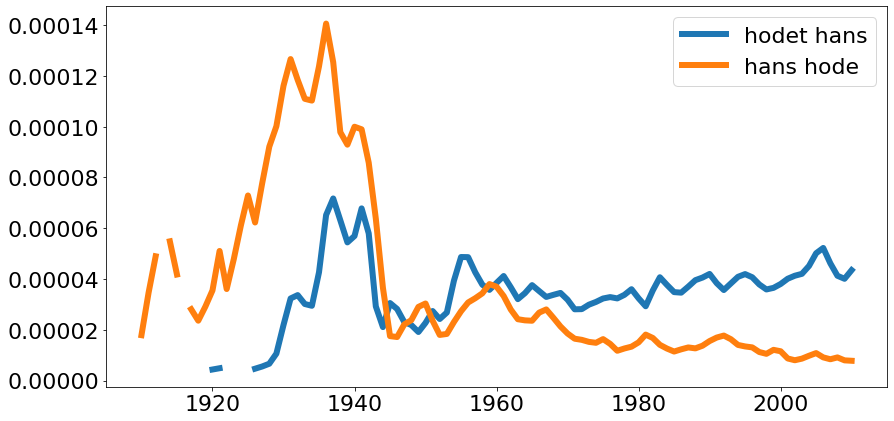

In [50]:
nb.nb_ngram("hodet hans, hans hode", years=(1910, 2010), corpus='avis').sort_index().plot()

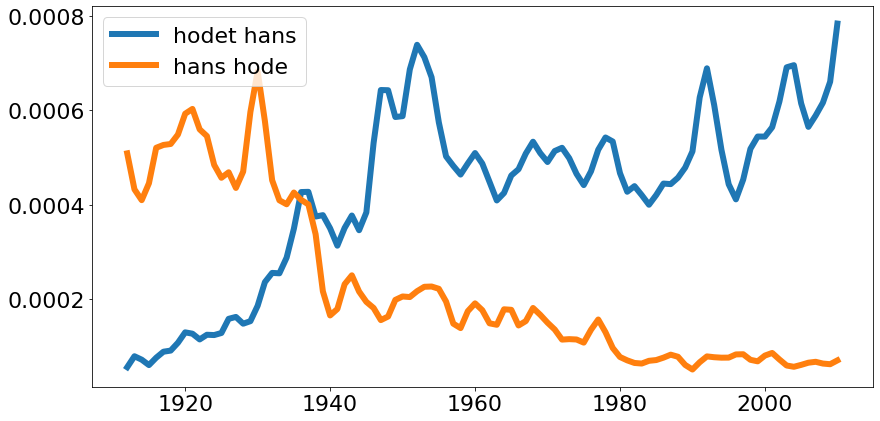

In [52]:
nb.nb_ngram("hodet hans, hans hode", years=(1910, 2010), corpus='bok').sort_index().plot()

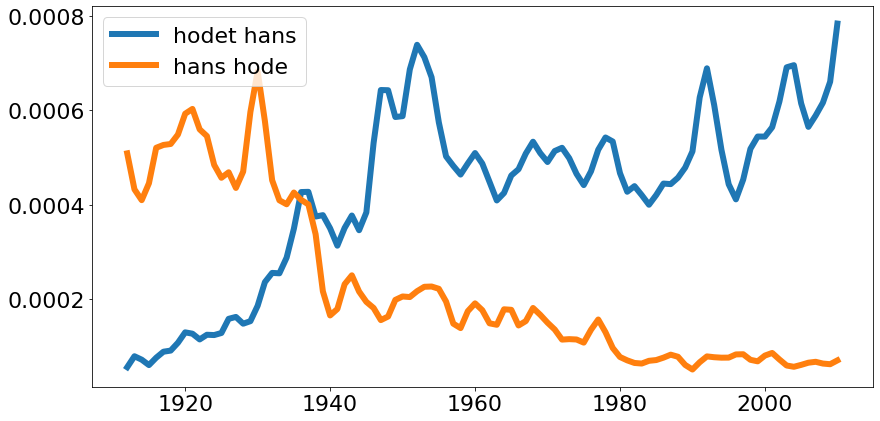

In [57]:
nb.nb_ngram("hodet hans, hans hode", years=(1910, 2010), corpus='bok').sort_index().plot();

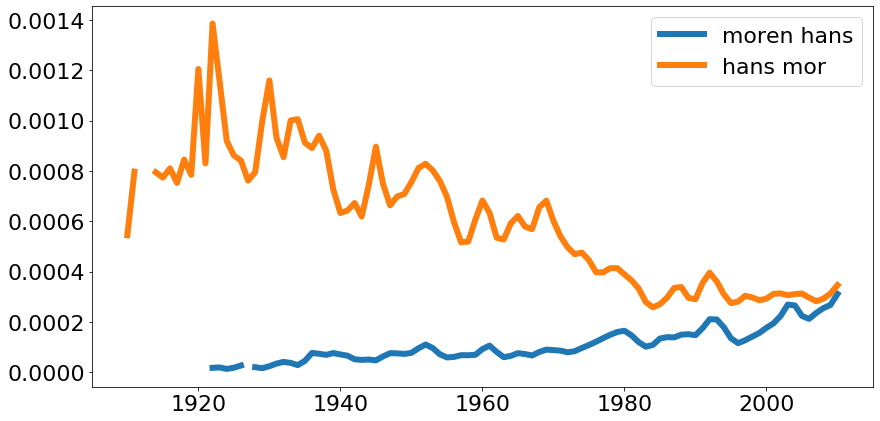

In [58]:
nb.nb_ngram("moren hans, hans mor", years=(1910, 2010)).sort_index().plot()

In [12]:
nb.nb_ngram("moren hans, hans mor", years=(1910, 2010), mode='abs').sum(axis=0)

moren hans    15745.50
hans mor      46095.75
dtype: float64

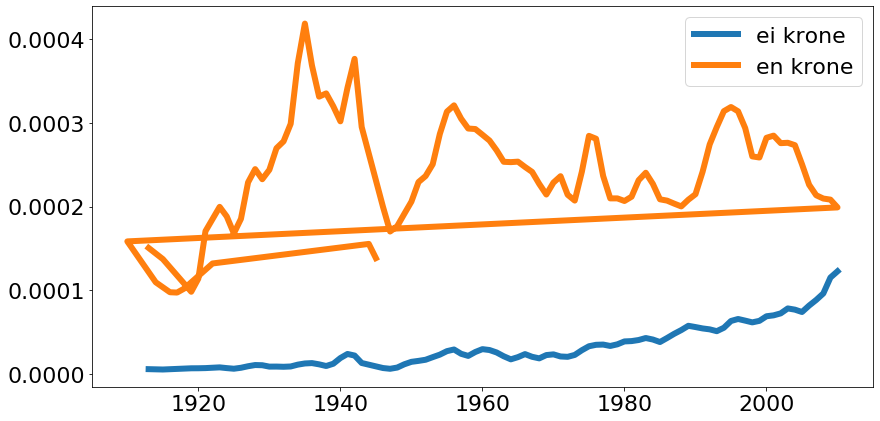

In [13]:
nb.nb_ngram("ei krone, en krone", corpus='avis', years=(1910, 2010)).plot()

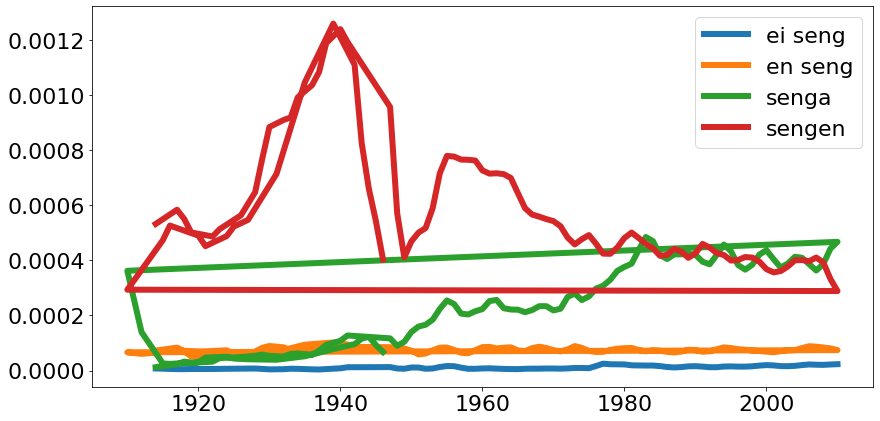

In [14]:
nb.nb_ngram("ei seng, en seng, senga, sengen", corpus='avis', years=(1910, 2010)).plot()

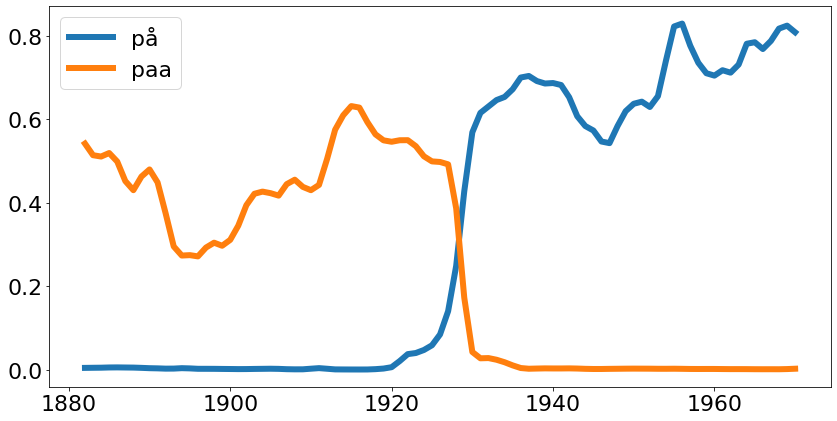

In [15]:
nb.nb_ngram("på, paa", corpus='avis', years=(1880, 1970)).plot()

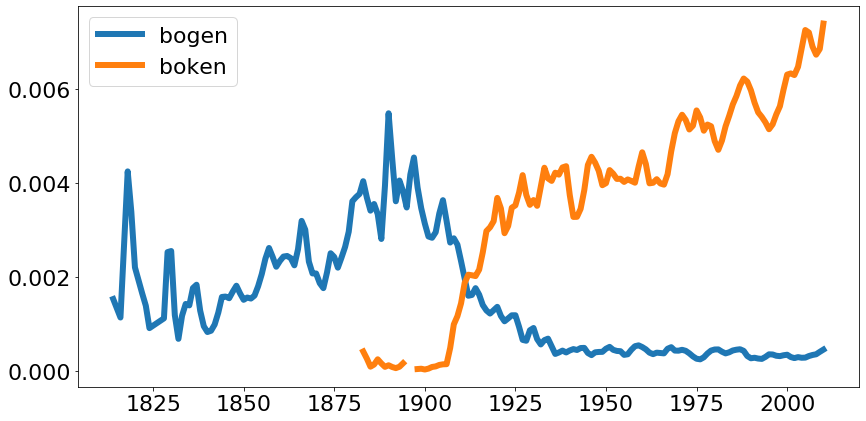

In [16]:
nb.nb_ngram("bogen, boken", corpus='bok', years=(1810, 2010)).plot()

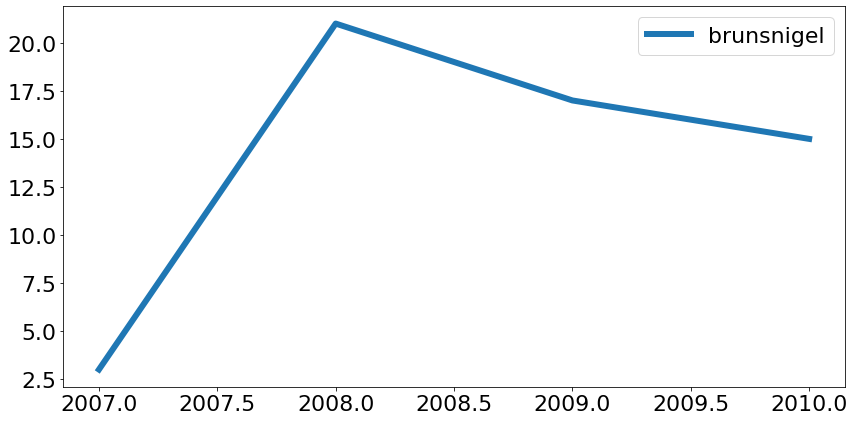

In [17]:
nb.nb_ngram("brunsnigel", corpus='avis', mode='ab', smooth=1,years=(1810, 2010)).plot()

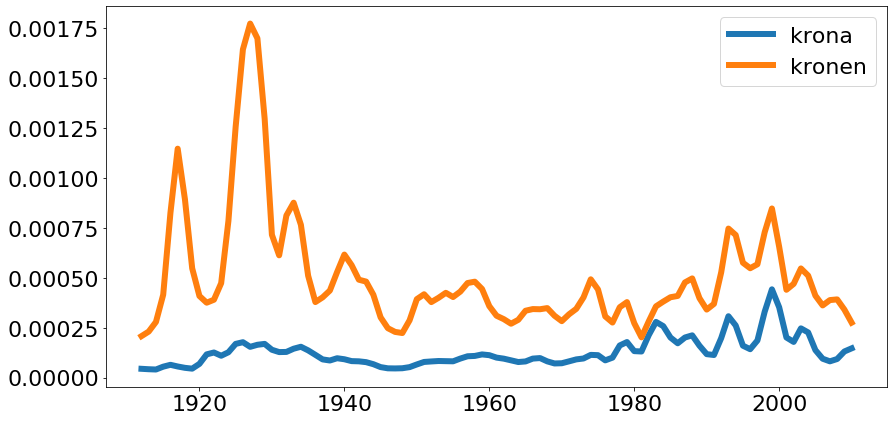

In [18]:
nb.nb_ngram("krona, kronen", corpus='avis', years=(1910, 2010)).plot()

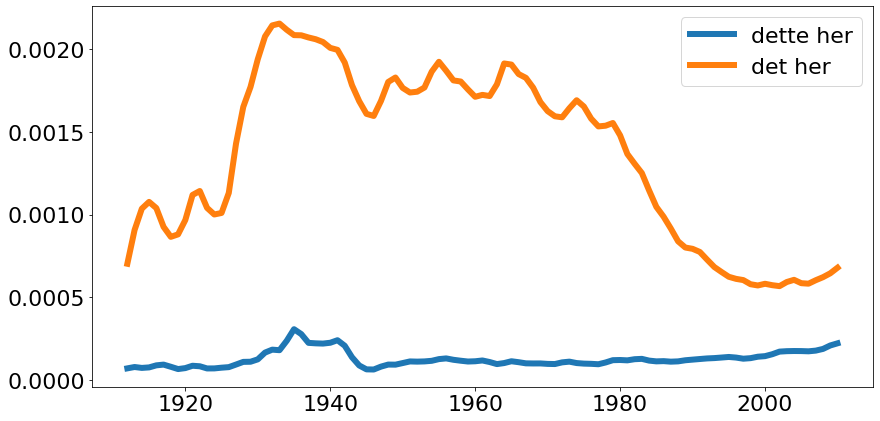

In [19]:
nb.nb_ngram("dette her, det her", corpus='avis', years=(1910, 2010)).plot()

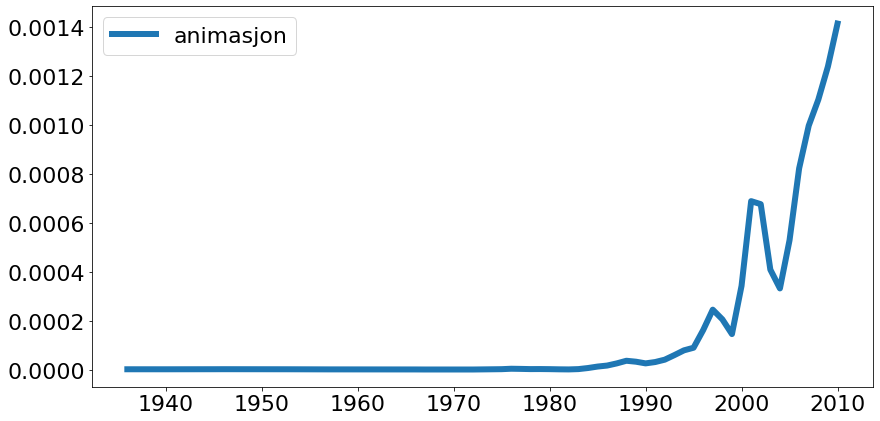

In [20]:
nb.nb_ngram("animasjon", corpus='avis', years=(1910, 2010)).plot()

In [21]:
def dobbel(word, det='den', **kwarg):
    dobbel = nb.nb_ngram('{w}, {det} {w}'.format(w=word, det=det), **kwarg)
    return nb.frame(dobbel['{det} {w}'.format(w=word, det=det)]/dobbel[word], word)

In [22]:
import pandas as pd

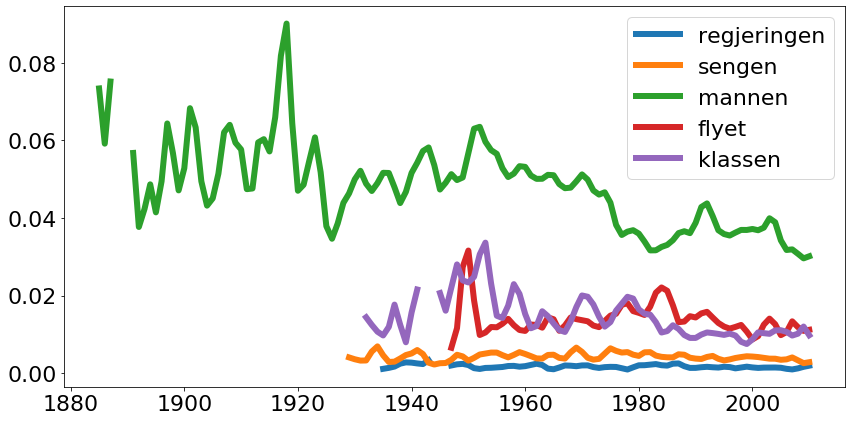

In [23]:
pd.concat([dobbel('regjeringen'), dobbel('sengen'), dobbel('mannen'), dobbel('flyet', 'det'), dobbel('klassen')], sort=False).plot()

In [24]:
dobbel('sykkelen', smooth = 5, years=(1950,1980), mode='abs')

,sykkelen
1950,NaN
1951,NaN
1952,NaN
1953,NaN
1954,0.014223
1955,0.016091
1956,0.015230
1957,0.014085
1958,0.014067
1959,0.016172


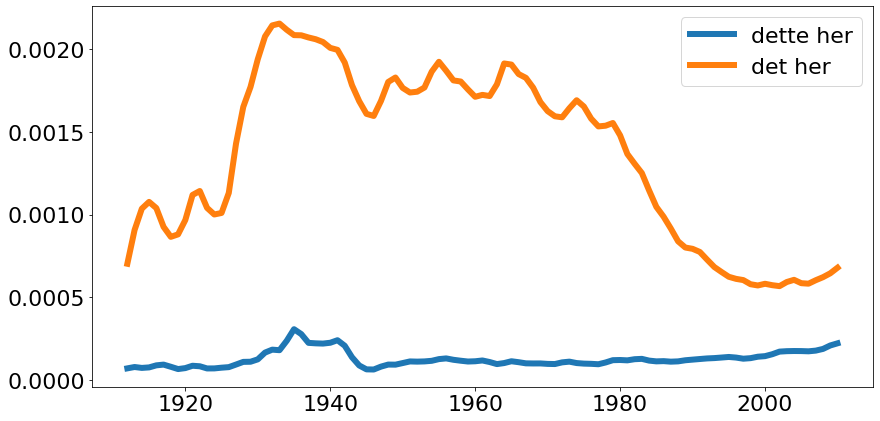

In [25]:
nb.nb_ngram("dette her, det her", corpus='avis', years=(1910, 2010)).plot()

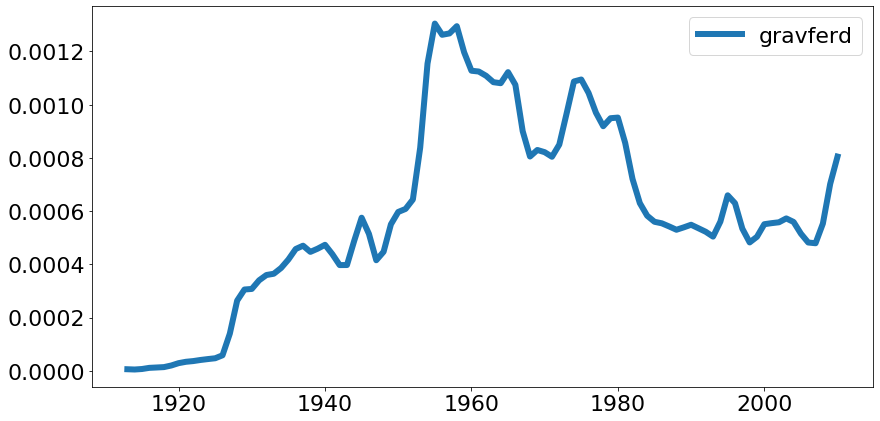

In [26]:
nb.nb_ngram("gravferd", corpus='avis', years=(1910, 2010)).plot()

In [27]:
nb.concordance(word = 'løpende', subject='finans', yearfrom = 1980, yearto = 2010, before = 4, after = 3)

"Bøhren, Øyvind,Finansiell økonomi,2006",forlag og forfattere samt,løpende,oppdatering av feil
"Bøhren, Øyvind,Finansiell økonomi,2006",nominell ( regnet i,løpende,priser ) eller
"Bøhren, Øyvind,Finansiell økonomi,2006",i forvaltningskapital målt i,løpende,priser vært temmelig
"Bøhren, Øyvind,Finansiell økonomi,2006","markedet , er den",løpende,kontantstrømmen definert .
"Bøhren, Øyvind,Finansiell økonomi,2006",alle beløp målt i,løpende,priser . Både
"Olsen, Eigil,Verdensbanken,1994",imidlertid brukt til myndighetenes,løpende,"utgifter , eller"
"Pedersen, Rune,Aksjer & pengeplassering,2000",. Dette gir deg,løpende,beregninger av gevinst
"Pedersen, Rune,Aksjer & pengeplassering,2000",for høye marginen Høy,løpende,kontantstrøm og god
"Hagen, Terje P.,Storbyenes finanser 1983-1997,1999",overfor prosjektet . Den,løpende,oppfølgingen av prosjektet
"Hagen, Terje P.,Storbyenes finanser 1983-1997,1999",grad forholde seg til,løpende,saker knyttet til
"Hagen, Terje P.,Storbyenes finanser 1983-1997,1999",I Trondheim skjer rapporteringen,løpende,. Det vil


In [28]:
korpus = nb.book_corpus(subject='språkvitenskap', limit = 50)

In [29]:
agg = nb.get_aggregated_corpus(nb.pure_urn(korpus))

In [30]:
agg.loc['løpende']

0    29
Name: løpende, dtype: int64

In [31]:
coll = nb.urn_coll(word = 'løpende', urns = nb.pure_urn(korpus), before = 0, after = 5)

In [32]:
tot = nb.totals(50000)

In [33]:
tot = nb.frame(tot)

In [34]:
viktige = nb.frame_sort(nb.frame(coll[0]/tot[0]))

Metonymiske relasjoner mellom objektene, del for hele, hele for del.
stickers game vs. stickers
1. sognsvann for tur til sognsvann


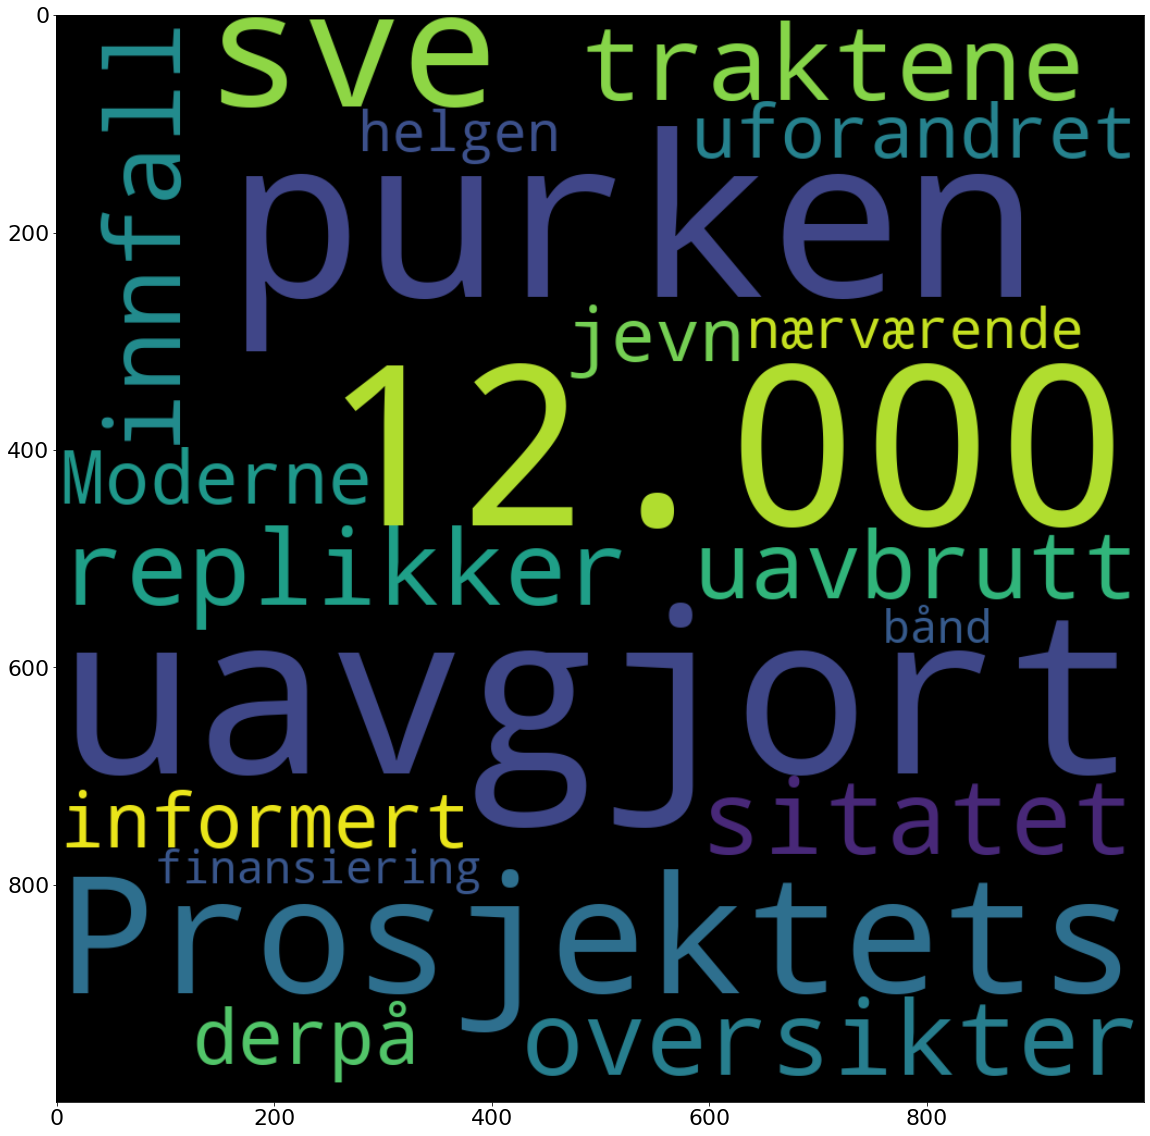

In [201]:
nb.cloud(viktige[:20])

In [136]:
MK = {
"Kamp" : "kamp, rifle, krutt, revolver, riflen, hylster, sår, blod, kjøtt, skjøt, skudd, avtrekkeren, siktet, død, døde, fyrte, ladegrep, siktet".split(', '),
"Glad":"glad, munter, plystret, lo, smilte, lettet, plystre, plystrer, muntre, live, lever, lettet, livlig, ler, smiler".split(', ')
}

In [137]:
MK

{'Kamp': ['kamp',
  'rifle',
  'krutt',
  'revolver',
  'riflen',
  'hylster',
  'sår',
  'blod',
  'kjøtt',
  'skjøt',
  'skudd',
  'avtrekkeren',
  'siktet',
  'død',
  'døde',
  'fyrte',
  'ladegrep',
  'siktet'],
 'Glad': ['glad',
  'munter',
  'plystret',
  'lo',
  'smilte',
  'lettet',
  'plystre',
  'plystrer',
  'muntre',
  'live',
  'lever',
  'lettet',
  'livlig',
  'ler',
  'smiler']}

In [146]:
nb.book_corpus(author='masterson%', title="%tigeren%montana%")

,urn,author,title,year
0,2014051908121,"Masterson, Louis",Tigeren fra Montana ; Den gale hunden fra Utah,2007
1,2015011608010,"Masterson, Louis",Tigeren fra Montana,1980
2,2013060408158,"Masterson, Louis",Tigeren fra Montana,1972


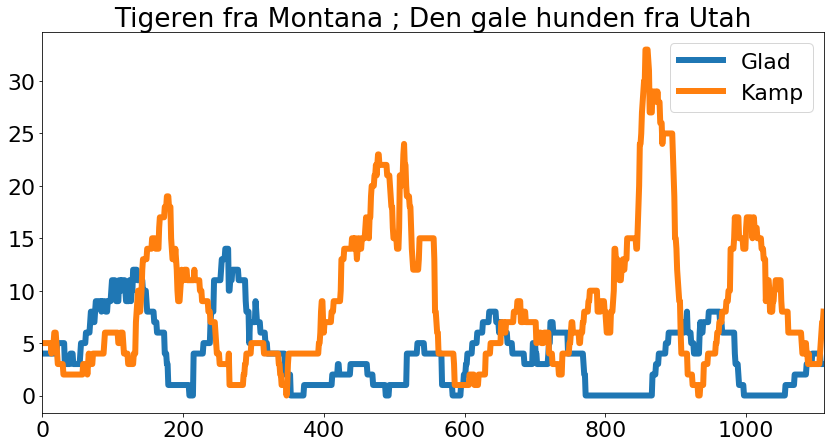

In [147]:
nb.plot_book_wordbags(2014051908121, MK).plot(title = "Tigeren fra Montana ; Den gale hunden fra Utah" )

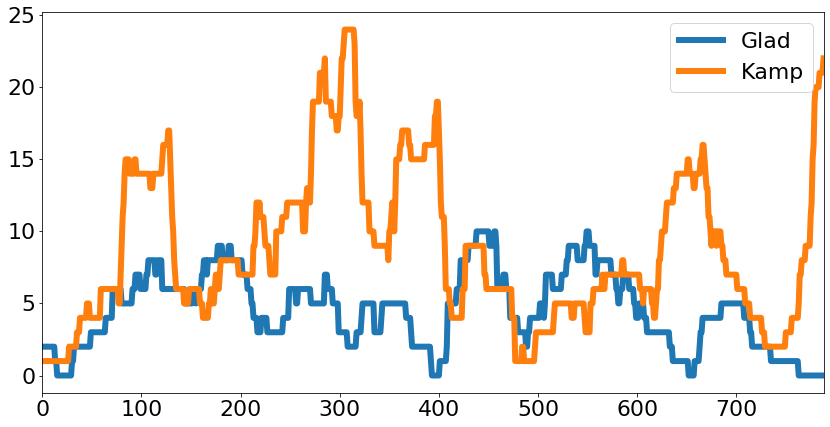

In [145]:
nb.plot_book_wordbags(2011100608069, MK).plot()